# Project 2
## Trevis Slagowski & Treyson Grange

In [229]:
import pandas as pd 
import seaborn as sns
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

In [230]:
zipcodes_df = pd.read_csv('datasets/AustinZipCodes.csv')
crime_df = pd.read_csv('datasets/crime-housing-austin-2015.csv')

## Data Exploration

In [231]:
display(zipcodes_df.head())

,#,Zip Code,Location,City,Population,People / Sq. Mile,National Rank
0,1,78705,"30.293474, -97.738268","Austin, Texas","26,825","11,008.66",#519
1,2,78751,"30.310819, -97.722821","Austin, Texas","14,005","5,822.28","#1,374"
2,3,78752,"30.331288, -97.704660","Austin, Texas","18,030","5,435.92","#1,528"
3,4,78741,"30.229845, -97.715136","Austin, Texas","40,661","5,346.47","#1,562"
4,5,78723,"30.305341, -97.683344","Austin, Texas","30,110","5,175.95","#1,640"


In [232]:
display(crime_df.head())

,Key,Council_District,Highest_Offense_Desc,Highest_NIBRS_UCR_Offense_Description,Report_Date,Location,Clearance_Status,Clearance_Date,District,Zip_Code_Crime,...,Rentalunitsaffordabletoaverageteacher,Ownerunitsaffordabletoaverageteacher,Rentalunitsaffordabletoaveragetechworker,Ownerunitsaffordabletoaveragetechworker,Changeinpercentageofpopulationbelowpoverty2000-2012,Changeinmedianrent2000-2012,Changeinmedianhomevalue2000-2012,Percentageofhomeswithin1/4-mioftransitstop,Averagemonthlytransportationcost,Percentageofhousingandtransportationcoststhatistransportation-related
0,201510782,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-15,9001 N IH 35 SVRD NB,N,28-Jan-15,E,78753.0,...,89%,75%,100%,98%,128%,26%,40%,59%,$708,44%
1,201511231,4.0,ROBBERY BY ASSAULT,Robbery,1-Jan-15,919 E KOENIG LN SVRD EB,N,13-Jan-15,I,78751.0,...,68%,10%,97%,42%,23%,38%,97%,98%,$550,40%
2,201511736,1.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,12151 N IH 35 SVRD NB,N,13-Jan-15,E,78753.0,...,89%,75%,100%,98%,128%,26%,40%,59%,$708,44%
3,201511433,4.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,1044 NORWOOD PARK BLVD,N,5-Jan-15,I,78753.0,...,89%,75%,100%,98%,128%,26%,40%,59%,$708,44%
4,201511936,2.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,2413 BITTER CREEK DR,N,7-Jan-15,F,78744.0,...,81%,87%,100%,100%,89%,26%,44%,63%,$708,40%


In [233]:
crime_df.columns

Index(['Key', 'Council_District', 'Highest_Offense_Desc',
       'Highest_NIBRS_UCR_Offense_Description', 'Report_Date', 'Location',
       'Clearance_Status', 'Clearance_Date', 'District', 'Zip_Code_Crime',
       'Census_Tract', 'X_Coordinate', 'Y_Coordinate', 'Zip_Code_Housing',
       'Populationbelowpovertylevel', 'Medianhouseholdincome',
       'Non-WhiteNon-HispanicorLatino', 'HispanicorLatinoofanyrace',
       'Populationwithdisability', 'Unemployment',
       'Largehouseholds(5+members)',
       'Homesaffordabletopeopleearninglessthan$50000',
       'Rentalsaffordabletopeopleearninglessthan$25000',
       'Rent-restrictedunits', 'HousingChoiceVoucherholders', 'Medianrent',
       'Medianhomevalue', 'Percentageofrentalunitsinpoorcondition',
       'Percentchangeinnumberofhousingunits2000-2012',
       'Ownerunitsaffordabletoaverageretail/serviceworker',
       'Rentalunitsaffordabletoaverageretail/serviceworker',
       'Rentalunitsaffordabletoaverageartist',
       'Ownerunits

In [234]:
crime_df.describe()

,Key,Council_District,Zip_Code_Crime,Census_Tract,X_Coordinate,Y_Coordinate,Zip_Code_Housing
count,3.857300e+04,38401.000000,38414.000000,38414.000000,3.798100e+04,3.798100e+04,37285.000000
mean,1.787442e+10,5.223458,78732.853777,72.426942,3.115612e+06,1.008005e+07,78734.385705
std,1.564763e+10,2.805340,25.877405,686.752321,1.508935e+04,2.857887e+04,22.619026
min,2.015103e+08,1.000000,78613.000000,1.010000,3.040396e+06,1.001173e+07,78617.000000
25%,2.015186e+10,3.000000,78719.000000,15.040000,3.106999e+06,1.005776e+07,78721.000000
50%,2.015500e+10,5.000000,78744.000000,18.230000,3.116494e+06,1.007645e+07,78744.000000
75%,2.015503e+10,8.000000,78752.000000,23.040000,3.126048e+06,1.010246e+07,78753.000000
max,2.015153e+12,10.000000,78759.000000,9800.000000,3.164242e+06,1.015923e+07,78759.000000


In [235]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38573 entries, 0 to 38572
Data columns (total 43 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Key                                                                    38573 non-null  int64  
 1   Council_District                                                       38401 non-null  float64
 2   Highest_Offense_Desc                                                   38573 non-null  object 
 3   Highest_NIBRS_UCR_Offense_Description                                  38573 non-null  object 
 4   Report_Date                                                            38573 non-null  object 
 5   Location                                                               38092 non-null  object 
 6   Clearance_Status                                                       36649 non-null 

In [236]:
display(crime_df['Location'].value_counts())

1030 NORWOOD PARK BLVD            577
2901 S CAPITAL OF TEXAS HWY NB    376
9300 S IH 35 SVRD SB              351
2508 E RIVERSIDE DR               269
11200 LAKELINE MALL DR            263
                                 ... 
2508 BLOCK E RIVERSIDE DR           1
2308 RACHAEL CT                     1
1904 HEARTHSIDE DR                  1
806 GREAT BRITAIN BLVD              1
1100 BLOCK HARGRAVE ST              1
Name: Location, Length: 16764, dtype: int64

In [237]:
display(crime_df['Clearance_Status'].value_counts())

N    30462
C     5245
O      942
Name: Clearance_Status, dtype: int64

## First Analysis

In [238]:
crime_df['households'] = crime_df['Largehouseholds(5+members)'].str.replace('%', '').astype('float')
display(crime_df['households'])

0        16.0
1         2.0
2        16.0
3        16.0
4        23.0
         ... 
38568    10.0
38569     6.0
38570     2.0
38571    28.0
38572    10.0
Name: households, Length: 38573, dtype: float64

## Second Analysis Bulgary success rate compared to Median Household Income
(Burglaries are defined as "BURGLARY OF RESIDENCE" by the Highest_Offense_Desc column)

(38573,)


/tmp/ipykernel_49078/424078444.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  crime_df['householdincome'] = crime_df['Medianhouseholdincome'].str.replace('$', '').astype('float')
/tmp/ipykernel_49078/424078444.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  burglarie = pre[crime_df['Highest_Offense_Desc'] == 'BURGLARY OF RESIDENCE']


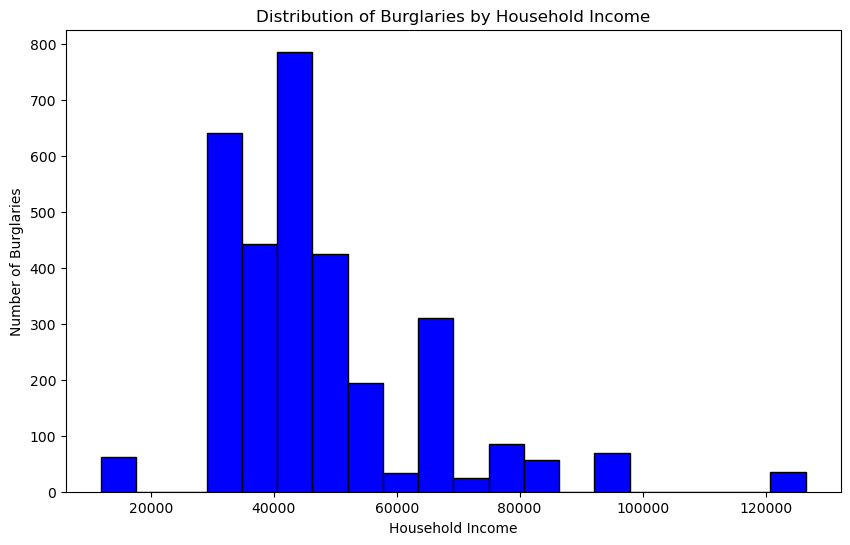

In [239]:
import seaborn as sns
# Does the houshold income correlate to how much bulguaries happen in the area?
crime_df['householdincome'] = crime_df['Medianhouseholdincome'].str.replace('$', '').astype('float')
houseHoldIncome = crime_df['householdincome']
print(houseHoldIncome.shape)


pre = crime_df[crime_df['Highest_NIBRS_UCR_Offense_Description'] == 'Burglary']
burglarie = pre[crime_df['Highest_Offense_Desc'] == 'BURGLARY OF RESIDENCE']



plt.figure(figsize=(10, 6))
plt.hist(burglarie['householdincome'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Household Income')
plt.ylabel('Number of Burglaries')
plt.title('Distribution of Burglaries by Household Income')
plt.show()


According to our histogram, we see almost all burglaries happen in the $40000 - $60000. Makes sense that's where most people live. Lets normalize and focus on cases that have been cleared. 

The number of rows in the cleared_by_arrest DataFrame is: 297
The number of crimes that were not solved (O or N) is: 2941


/tmp/ipykernel_49078/3024263032.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  burglarie['IncomeGroup'] = pd.cut(burglarie['householdincome'], bins=income_bins, labels=income_labels)


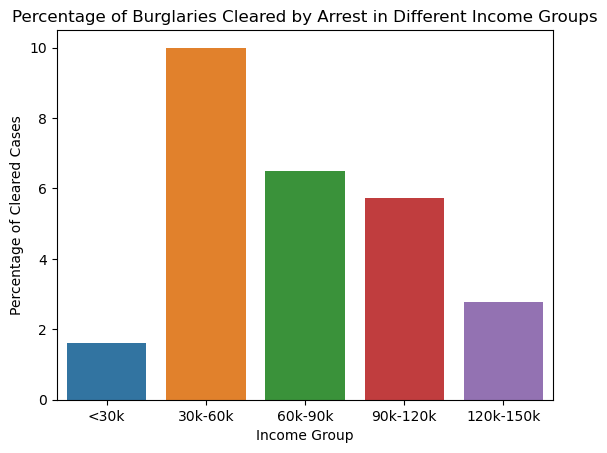

In [240]:
income_bins = [0, 30000, 60000, 90000, 120000, 150000]
income_labels = ['<30k', '30k-60k', '60k-90k', '90k-120k', '120k-150k']

burglarie['IncomeGroup'] = pd.cut(burglarie['householdincome'], bins=income_bins, labels=income_labels)

cleared_by_arrest = burglarie[burglarie['Clearance_Status'] == 'C']

print(f"The number of rows in the cleared_by_arrest DataFrame is: {cleared_by_arrest.shape[0]}")
print(f"The number of crimes that were not solved (O or N) is: {burglarie.shape[0] - cleared_by_arrest.shape[0]}")

total_cases = burglarie.groupby('IncomeGroup').size().reset_index(name='TotalCases')

cleared_counts = cleared_by_arrest.groupby('IncomeGroup').size().reset_index(name='ClearedCases')

merged_df = pd.merge(total_cases, cleared_counts, on='IncomeGroup', how='left')

merged_df['PercentageCleared'] = (merged_df['ClearedCases'] / merged_df['TotalCases']) * 100


sns.barplot(x='IncomeGroup', y='PercentageCleared', data=merged_df)
plt.title('Percentage of Burglaries Cleared by Arrest in Different Income Groups')
plt.xlabel('Income Group')
plt.ylabel('Percentage of Cleared Cases')
plt.show()

## So even after normalizing our data, we see that the 30k-60k have the most cleared by arrest burglaries

### But it is important to note, that these are only in the range of 4-9% clear rate.
That means that very little burglaries get solved in the Austin Texas area. 
Whether this be because of police department negligence or lack of security in areas.

### Why is this important?
Even after normalizing our data, we see that the 30k - 60k has the best chance of ending in an arrest.
- For the <30k group, it is most likely because they either have poor security making the break in easier, or just don't care enough when the police ask for more information
- For the other end, 120K - 150K, it is less obvious. A thought could be that rich people seem to never be home, causing an influx of unsolved cases.

## Third Analysis

### Rental units affordable to an average teacher and the frequency of crime types in those Council Districts

In [241]:
display(crime_df['Highest_NIBRS_UCR_Offense_Description'].unique())

array(['Robbery', 'Burglary', 'Auto Theft', 'Agg Assault', 'Theft',
       'Rape', 'Murder'], dtype=object)

In [242]:
display(crime_df['Council_District'].value_counts())

9.0     6035
3.0     5613
4.0     5408
7.0     4465
1.0     3937
5.0     3484
2.0     3355
8.0     2143
6.0     2069
10.0    1892
Name: Council_District, dtype: int64

#### First, we need to process the teacher rental housing affordability data. We can take the mean of the affordability percentage in each Council District.

<AxesSubplot: title={'center': 'Average Affordability by Council District'}, xlabel='Council_District', ylabel='Rental Units affordable to Average Teacher'>

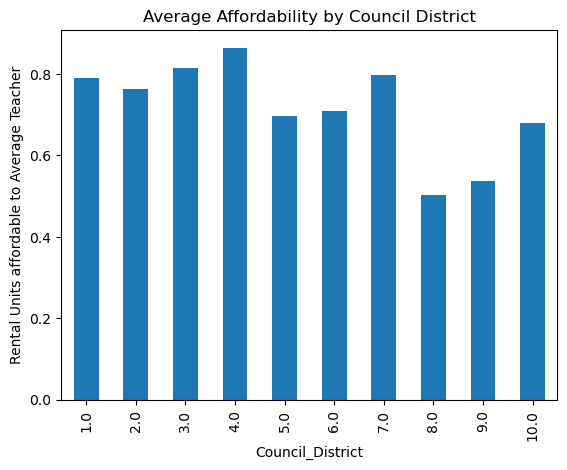

In [243]:
def percentage_to_float(percentage_str):
    if isinstance(percentage_str, str):
        return float(percentage_str.strip('%')) / 100
    return np.nan

crime_df['Rental_Affordable_to_Teacher'] = crime_df['Rentalunitsaffordabletoaverageteacher'].apply(percentage_to_float)

average_affordability = crime_df.groupby('Council_District')['Rental_Affordable_to_Teacher'].mean()
average_affordability.plot(kind='bar', ylabel='Rental Units affordable to Average Teacher', title='Average Affordability by Council District')   

#### Next, we need to aggregate crime data. We will count the number of burglaries in each Council District.

In [244]:
unique_crimes = crime_df['Highest_NIBRS_UCR_Offense_Description'].unique()

crime_data_dict = {}

for crime in unique_crimes:
    crime_counts = crime_df[crime_df['Highest_NIBRS_UCR_Offense_Description'] == crime].groupby('Council_District').size()
    merged_data = pd.DataFrame({
        f'{crime}_Count': crime_counts,
        'Average_Affordability': average_affordability
    }).dropna()
    crime_data_dict[crime] = merged_data

unique_crimes

array(['Robbery', 'Burglary', 'Auto Theft', 'Agg Assault', 'Theft',
       'Rape', 'Murder'], dtype=object)

#### Let's plot the results in a scatter plot

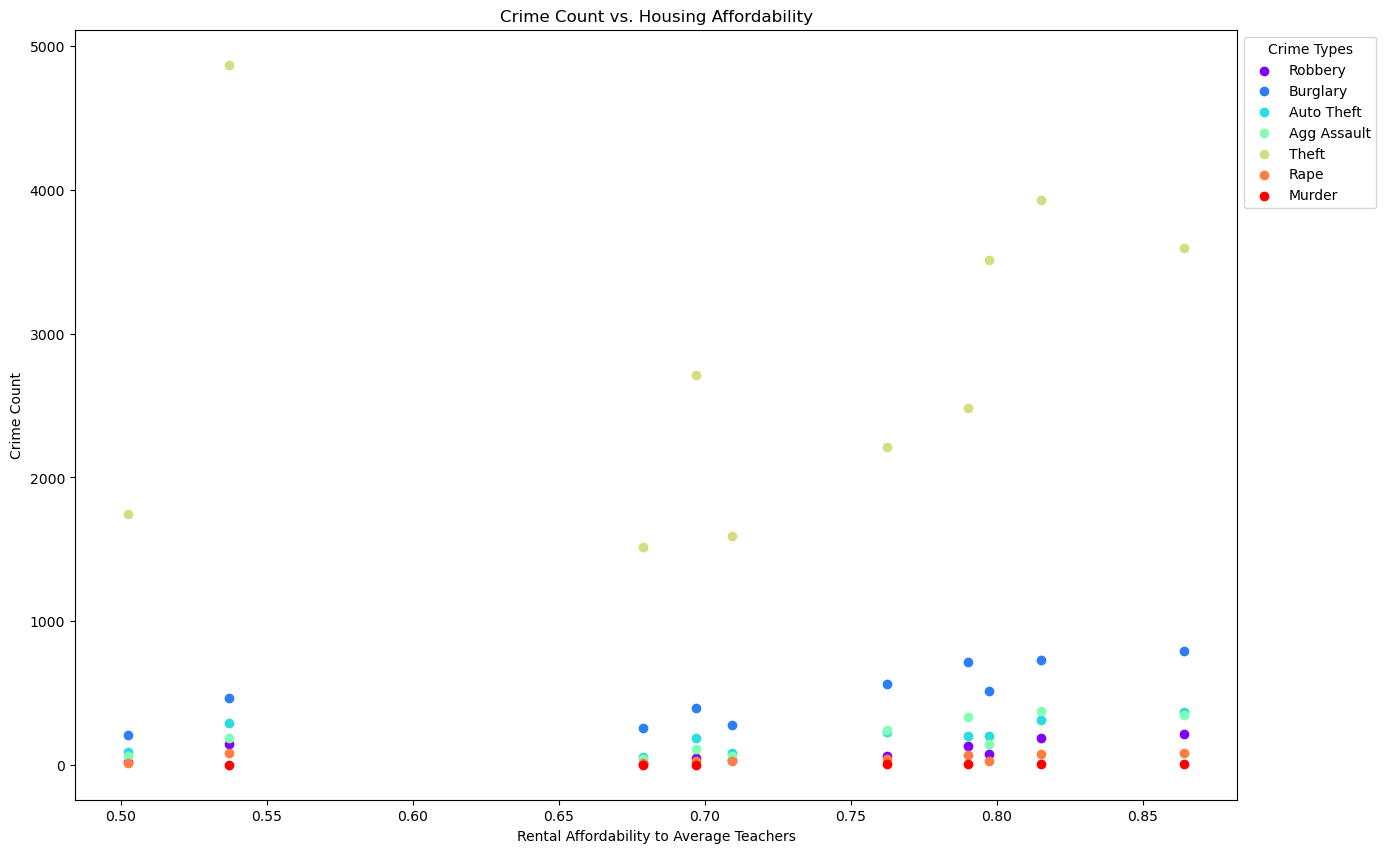

In [245]:
fig, ax = plt.subplots(figsize=(15, 10))
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_crimes)))

for i, crime in enumerate(unique_crimes):
    ax.scatter(x=crime_data_dict[crime]['Average_Affordability'], y=crime_data_dict[crime][f'{crime}_Count'],
               color=colors[i], label=crime)

ax.set_xlabel('Rental Affordability to Average Teachers')
ax.set_ylabel('Crime Count')
ax.set_title('Crime Count vs. Housing Affordability')
ax.legend(title='Crime Types', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

#### Check the for any correlations between Rental Affordability to Average Teachers and the Crime Type

In [246]:
correlation_dict = {}

for crime in unique_crimes:
    crime_count_col = f'{crime}_Count'

    correlation_dict[crime] = stats.pearsonr(crime_data_dict[crime][crime_count_col], crime_data_dict[crime]['Average_Affordability'])

for correlation in correlation_dict: 
    print(f"{correlation}: {correlation_dict[correlation]}")

Robbery: PearsonRResult(statistic=0.49797319172972315, pvalue=0.14299130987118389)
Burglary: PearsonRResult(statistic=0.7524148439938886, pvalue=0.012040988637993074)
Auto Theft: PearsonRResult(statistic=0.46442974277524657, pvalue=0.17628999052759042)
Agg Assault: PearsonRResult(statistic=0.6396279144383077, pvalue=0.04642298953435549)
Theft: PearsonRResult(statistic=0.12502540179510496, pvalue=0.7307420539041181)
Rape: PearsonRResult(statistic=0.35804935361581214, pvalue=0.30968924312650786)
Murder: PearsonRResult(statistic=0.7905787384700049, pvalue=0.03431296459010063)


It looks like there is a correlation for Burglary, Agg Assault, and Murder. Let's look more closely at those. 

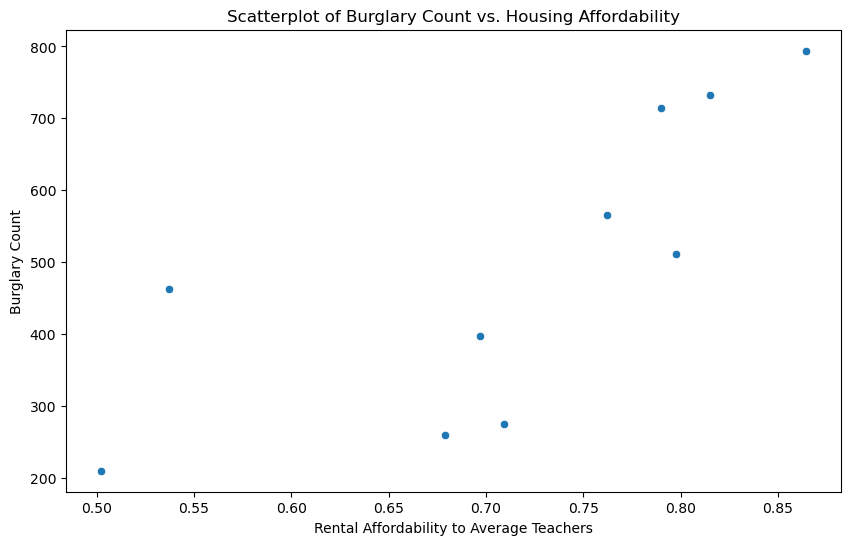

Burglary: PearsonRResult(statistic=0.7524148439938886, pvalue=0.012040988637993074)


In [247]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=crime_data_dict['Burglary']['Average_Affordability'], y=crime_data_dict['Burglary']['Burglary_Count'], data=crime_data_dict['Burglary'])
plt.title('Scatterplot of Burglary Count vs. Housing Affordability')
plt.xlabel('Rental Affordability to Average Teachers')
plt.ylabel('Burglary Count')
plt.show()

print(f"Burglary: {correlation_dict['Burglary']}")

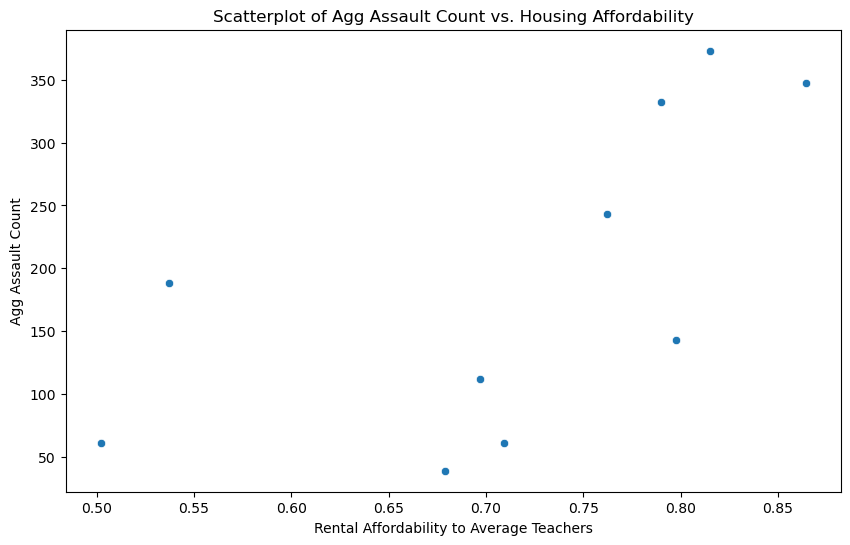

Agg Assault: PearsonRResult(statistic=0.6396279144383077, pvalue=0.04642298953435549)


In [248]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=crime_data_dict['Agg Assault']['Average_Affordability'], y=crime_data_dict['Agg Assault']['Agg Assault_Count'], data=crime_data_dict['Agg Assault'])
plt.title('Scatterplot of Agg Assault Count vs. Housing Affordability')
plt.xlabel('Rental Affordability to Average Teachers')
plt.ylabel('Agg Assault Count')
plt.show()

print(f"Agg Assault: {correlation_dict['Agg Assault']}")

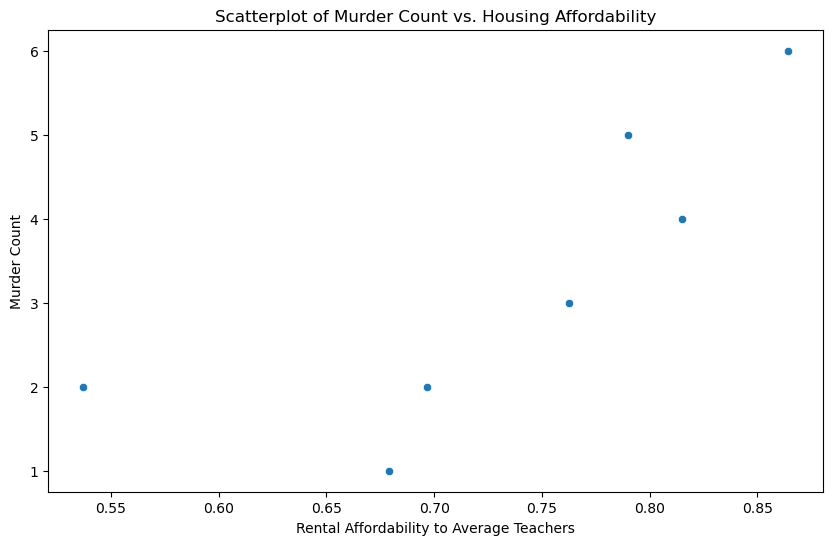

Murder: PearsonRResult(statistic=0.7905787384700049, pvalue=0.03431296459010063)


In [249]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=crime_data_dict['Murder']['Average_Affordability'], y=crime_data_dict['Murder']['Murder_Count'], data=crime_data_dict['Murder'])
plt.title('Scatterplot of Murder Count vs. Housing Affordability')
plt.xlabel('Rental Affordability to Average Teachers')
plt.ylabel('Murder Count')
plt.show()

print(f"Murder: {correlation_dict['Murder']}")

There appears to be a statistically significant relationship between the crime rates of burglary, aggravated assault, and murder, and the rental affordability to an average teacher in different council districts. A positive coefficient indicates that as the rental affordability increases, so does the crime rate. But we can not definitively say this is the only attribute contributing to crime rates in Council Districts. 

## Fourth Analysis
### Crime Statistics by Location Data